# Time stamp based video labeling from single camera

In [1]:
cd ../

C:\Users\luisr\Desktop\Repositories\Data Science Projects\Hackaton COR IV - Centro de Operações do RJ\INCUBAÇÃO\Cameras


### Code reference

#### Code preference: '1649','1648', # ignore '3261','1392'

#### Good visibility: 1646, 1475

### Function to label dataset of videos or images based on labels' timestamps

In [2]:
import numpy as np, pandas as pd

def label_videos(videos, dt_col, label_params, partially_labeled_videos_path=None):

    # create video dataset copy for labeling

    videos_copy = videos.copy()

    for params in label_params:

        # define parameters

        label_series = params['label_series']
        query = params['query'] if 'query' in params else {}

        # take video dataset

        df = videos.copy()

        # format labels' timestamps

        label_series = pd.Series(label_series)
        label_series.index = pd.to_datetime(label_series.index)
        label_series.sort_index(inplace=True)
        stamps = label_series.index
        n_stamps = len(stamps)

        # query video dataset

        for key in query: # accepts either direct value or list
            values = query[key] if type(query[key]) is list else [query[key]]
            df = df[df[key].isin(values)]

        # cut video dataset to enclose provided timestamps

        start, end = stamps.min(), stamps.max()
        df = df[(df[dt_col] >= start) & (df[dt_col] <= end)]

        # generated labels by timestamp interval

        labels = pd.Series(np.nan, index=df.index) # np.nan series with the index of the filtered dataset

        for i in range(n_stamps - 1):
            t1, t2 = stamps[i], stamps[i + 1] # label start and end timestamps
            msk_t = (df[dt_col] >= t1) & (df[dt_col] <= t2)
            labels[msk_t] = label_series.loc[t1]

        # create columns with labels (for the subset and complete datasets)

        df['tag'] = labels
        videos_copy.loc[df.index, 'tag'] = df['tag']

        # save videos partial dataset as csv (completely labeled)
        
        if 'path' in params:
            path = params['path']
            df.to_csv(path, index=False)

        # display label count result

        display(df['tag'].value_counts().to_frame(f'Tag count · code: {query["code"]}'))

    # save videos complete dataset as csv (partially labeled)

    if partially_labeled_videos_path is not None:
        videos_copy.to_csv(partially_labeled_videos_path, index=False)
        
    return videos_copy

### Load videos and images control datasets

In [3]:
import numpy as np, pandas as pd

# load videos dataset

video_control_path = 'Dados/Controle de vídeos/videos_control_2023-04-29.csv'
videos = pd.read_csv(video_control_path)

# load images dataset

image_control_path = 'Dados/Controle de vídeos/images_control_2023-04-29.csv'
images = pd.read_csv(image_control_path)

# data preprocessing
videos['timestamp'] = pd.to_datetime(videos['timestamp'])
images['timestamp'] = pd.to_datetime(images['timestamp'])
images['image_timestamp'] = pd.to_datetime(images['image_timestamp'])

### Define video/image  labels' timestamps and parameters

In [4]:
# path parameters

# partially_labeled_videos_path = 'Dados/Rotulados/videos_control_labeled_2023-04-29.csv'
# partially_labeled_imags_path = 'Dados/Rotulados/images_control_labeled_2023-04-29.csv'

# label parameters

label_params = [{
    'path': 'Dados/Rotulados/videos_labeled_CODE1648_2023-04-29.csv',
    'query': {
        'code': 1648,
        'folder_structure': [
            '{source}/{type}/{event}/{code}',
            'polygons/{type}/{polygon}/{code}',
        ]
    },
    'label_series': { # timestamps below should enclose the timestamps of all videos matching `query`
        '2023-02-07 19:25:00': 'poça', # start 07/02
        '2023-02-07 19:35:00': 'lâmina',
        '2023-02-07 19:54:00': 'bolsão',
        '2023-02-07 20:00:00': 'alagamento',
        '2023-02-07 20:12:00': 'bolsão', # !!
        '2023-02-07 20:13:00': 'poça', # !!
        '2023-02-07 21:50:00': 'poça',
        '2023-02-07 22:46:00': 'poça', # end 07/02
        '2023-02-08 00:35:00': 'poça', # start 08/02 !!
        '2023-02-08 06:00:00': 'normalidade',
        '2023-02-08 09:45:00': 'normalidade', # end 08/02
        '2023-02-14 08:42:00': 'normalidade', # start 14/02
        '2023-02-14 11:45:00': 'normalidade', # end 14/02
    }
}, {
    'path': 'Dados/Rotulados/videos_labeled_CODE1649_2023-04-29.csv',
    'query': {
        'code': 1649,
        'folder_structure': [
            '{type}/{subtype}/{code}',
            'polygons/{type}/{polygon}/{code}',
        ]
    },
    'label_series': { # timestamps below should enclose the timestamps of all videos matching `query`
        '2023-02-07 19:25:00': 'poça', # start 07/02
        '2023-02-07 19:35:00': 'lâmina',
        '2023-02-07 20:00:00': 'bolsão',
        '2023-02-07 20:03:00': 'alagamento',
        '2023-02-07 20:11:00': 'bolsão',
        '2023-02-07 20:14:00': 'lâmina',
        '2023-02-07 21:35:00': 'normalidade',
        '2023-02-07 22:48:00': 'normalidade', # end 07/02
        '2023-02-08 00:35:00': 'normalidade', # start 08/02
        '2023-02-08 09:51:00': 'normalidade',
        '2023-02-08 15:55:00': 'normalidade',
        '2023-02-08 16:20:00': 'normalidade', # end 08/02
        '2023-02-14 08:42:00': 'normalidade', # start 14/02
        '2023-02-14 11:45:00': 'normalidade'
    }
}, {
    'path': 'Dados/Rotulados/videos_labeled_CODE1475_2023-04-29.csv',
    'query': {
        'code': 1475,
        'folder_structure': [
            '{source}/{type}/{event}/{code}',
            'polygons/{type}/{polygon}/{code}',
            'polygons/{source}/{type}/{polygon}/{code}',
        ]
    },
    'label_series': { # timestamps below should enclose the timestamps of all videos matching `query`
        '2023-02-07 19:25:00': 'alagamento', # start 07/02
        '2023-02-08 00:35:00': 'bolsão', # start 08/02
        '2023-02-08 01:20:00': 'lâmina',
        '2023-02-08 01:52:30': 'poça',
        '2023-02-08 02:32:30': 'normalidade',
        '2023-02-11 20:50:00': 'alagamento', # start 11/02
        '2023-02-11 20:51:00': 'normalidade', # end 11/02
        '2023-03-02 00:00:00': 'normalidade', # after end of 2023-03-01 ?
    }
}, {
    'path': 'Dados/Rotulados/videos_labeled_CODE1487_2023-04-29.csv',
    'query': {
        'code': 1487,
        'folder_structure': [
            '{type}/{subtype}/{code}',
            'polygons/{type}/{polygon}/{code}',
        ]
    }, # ****************** RECHECK FOR MISSING HOLES BETWEEN VIDEOS *******************************
    'label_series': { # timestamps below should enclose the timestamps of all videos matching `query`
        '2023-02-07 19:25:00': 0.2, # right before start of 2023-02-07 video
        '2023-02-07 19:49:55': 1.0,
        '2023-02-07 20:09:30': 0.8,
        '2023-02-07 20:10:35': 0.6,
        '2023-02-07 20:11:50': 0.4,
        '2023-02-07 20:14:20': 0.2,
        '2023-02-07 22:35:00': 0.0, # right after end of 2023-02-07 video
        '2023-02-08 01:09:55': 0.0, # right before start of 2023-02-08 video
        '2023-02-08 10:00:00': 0.0, # right after end of 2023-02-08 video
        '2023-02-08 15:50:00': 0.0, # right before start of second 2023-02-08 video
        '2023-02-08 16:25:00': 0.0, # right after end of second 2023-02-08 video
        '2023-04-07 11:35:00': 0.0, # right before start of 2023-04-07 video
        '2023-04-07 20:56:00': 0.0, # right after end of 2023-04-07 video
        '2023-04-07 21:04:00': 0.0, # right before start of second 2023-04-07 video
        '2023-04-07 23:56:00': 0.0, # right after end of second 2023-04-07 video
        '2023-04-08 00:00:00': 0.0, # right before start of 2023-04-08 video
        '2023-04-08 03:19:55': 0.2,
        '2023-04-08 03:39:55': 0.4,
        '2023-04-08 03:44:55': 0.6,
        '2023-04-08 04:14:55': 0.4,
        '2023-04-08 04:24:55': 0.2,
        '2023-04-08 05:14:55': 0.0,
        '2023-04-08 06:14:55': 0.2,
        '2023-04-08 06:39:55': 0.0,
        '2023-04-08 06:49:55': 0.2,
        '2023-04-08 07:14:55': 0.0,
        '2023-04-08 07:59:55': 0.2,
        '2023-04-08 10:14:55': 0.0,
    }
}]

### Label videos from multiple cameras  based on labels' timestamps

In [5]:
control = videos.copy()
dt_col = 'timestamp'
partially_labeled_videos_path = 'Dados/Rotulados/videos_control_labeled_2023-04-29.csv'

videos_labeled = label_videos(control, dt_col, label_params, partially_labeled_videos_path)

,Tag count · code: 1648
normalidade,114
poça,78
lâmina,3
alagamento,3
bolsão,1


,Tag count · code: 1649
normalidade,186
lâmina,8
poça,2
alagamento,2
bolsão,1


,Tag count · code: 1475
normalidade,120
alagamento,28
poça,8
lâmina,5
bolsão,4


,Tag count · code: 1487
0.0,276
0.2,70
0.6,6
1.0,5
0.4,3


### Label images from multiple cameras based on labels' timestamps

In [6]:
control = images.copy()
dt_col = 'image_timestamp'
partially_labeled_images_path = 'Dados/Rotulados/images_control_labeled_2023-04-29.csv'

# correct image labeling path parameter
images_label_params = label_params.copy()
for params in images_label_params:
    params['path'] = params['path'].replace('videos', 'images')

images_labeled = label_videos(control, dt_col, images_label_params, partially_labeled_images_path)

,Tag count · code: 1648
poça,4613
normalidade,2664
alagamento,647
bolsão,200
lâmina,26


,Tag count · code: 1649
normalidade,6893
bolsão,560
alagamento,449
lâmina,419
poça,18


,Tag count · code: 1475
normalidade,4145
alagamento,3553
poça,296
lâmina,179
bolsão,123


,Tag count · code: 1487
0.0,7310
0.2,2542
0.4,585
0.6,495
1.0,227
0.8,195


---
## Exploratory data analysis 

In [10]:
cd ../

C:\Users\luisr\Desktop\Repositories\Data Science Projects\Hackaton COR IV - Centro de Operações do RJ\INCUBAÇÃO


In [11]:
import numpy as np, pandas as pd

### Analysis of labeled videos and images

#### Reload videos and image labeled datasets

In [13]:
videos_labeled = pd.read_csv('Dados/Rotulados/videos_control_labeled_2023-04-29.csv')
images_labeled = pd.read_csv('Dados/Rotulados/images_control_labeled_2023-04-29.csv')

# datetime conversion
videos_labeled['timestamp'] = pd.to_datetime(videos_labeled['timestamp'])
images_labeled['timestamp'] = pd.to_datetime(images_labeled['timestamp'])
images_labeled['image_timestamp'] = pd.to_datetime(images_labeled['image_timestamp'])

# set datetime index
videos_labeled = videos_labeled.set_index('timestamp', drop=True).sort_index()

# images_labeled.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16964\758651742.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  images_labeled = pd.read_csv('Dados/Rotulados/images_control_labeled_2023-04-29.csv')


#### Folder structure count

In [14]:
videos_labeled[['n_folders', 'folder_structure']].value_counts().sort_index()

n_folders  folder_structure                         
2          {type}/{code}                                21182
3          polygons/{type}/{code}                          69
           {type}/{subtype}/{code}                        478
4          polygons/{type}/{polygon}/{code}             11393
           {source}/{type}/{event}/{code}               10192
           {type}/{subtype}/{code}                         89
5          polygons/{source}/{type}/{polygon}/{code}      545
7          {type}/{subtype}/{code}                         88
dtype: int64

In [15]:
images_labeled[['n_folders', 'folder_structure']].value_counts().sort_index()

n_folders  folder_structure                         
3          {type}/{subtype}/{code}                       20473
4          polygons/{type}/{polygon}/{code}             496604
           {source}/{type}/{event}/{code}               138708
           {type}/{subtype}/{code}                        3727
5          polygons/{source}/{type}/{polygon}/{code}     19127
dtype: int64

### Analysis by camera

#### Reload labeled dataset by camera code

In [ ]:
videos = pd.read_csv('Dados/Rotulos/1475_2023-02-07.csv')

videos['timestamp'] = pd.to_datetime(videos['timestamp'])
videos = videos.set_index('timestamp', drop=True).sort_index()

videos.head()

#### Bytes of largest videos

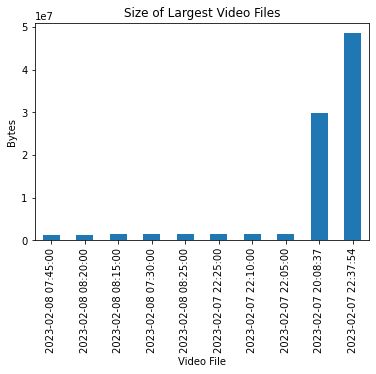

In [6]:
ax = videos['blob_size'].sort_values(ascending=True).tail(10).plot.bar(
    ylabel='Bytes', xlabel='Video File', title='Size of Largest Video Files'
)